<a href="https://colab.research.google.com/github/joao2000/Trabalhos/blob/main/Denso_happy_sad_LE610A_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LE610A: Sistemas de apoio à decisão e aprendizado de máquinas
### Professor Dr. Leonardo Tomazeli Duarte
# Projeto - Módulo 1: Classificação de emoções
## Integrantes:

*   Ana Luisa Zorzi Sambonovich - 165152

*   João Augusto Dantas Camelo Dos Santos - 237417

*   Matheus Rodrigues - 185315
*   Miguel Cataldo Mendonça Leite - 185577

Esse projeto propôs uma classificação de emoções, ao treinar a máquina para que 
ela saiba identificar um rosto e definir duas emoções distintas: a felicidade 
ou a tristeza.
Para isso, foi feito um banco de dados com diversas fotos de pessoas felizes e tristes. Após, vinculou-se o colab ao google drive (local onde foi armazenado o banco de dados), para que fosse possível a máquina fazer a leitura dessas fotos.
Para a leitura, foi necessário transformar as imagens em vetores, e separá-las em duas pastas: Happy e Sad. Em seguida, criou-se duas listas para armazenar os vetores. 
A partir disso, foi feito um modelo de treinamento e testes, e chegamos numa acurácia em torno de 77%.
Como resultados, ao colocar uma foto, o programa soube definir se a face da pessoa estava indicando felicidade ou tristeza.
Concluímos que o projeto atendeu às expectativas, com uma alta taxa de acurácia e respondendo corretamente ao que lhe foi solicitado. 


## 1) Importando as bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

#Imagens
import cv2 as cv   # CARREGAMENTO DE IMAGENS
import numpy as np  # PARA TRABALHAR COM MATRIZES E ARRAY
import matplotlib as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow   # PATCH DO GOOGLE COLAB PARA VISUALIZAR IMAGENS
import os #BIBLIOTECA PARA MANIPULAR OS ARQUIVOS NO GOOGLE DRIVE

## 2) Vinculando ao Drive

Usar o link para acessar a base de dados: https://drive.google.com/drive/folders/1IH7p3pK5sk1Y2Uw6c-vivx6NDNEDznEf?usp=sharing
Coloque um atalho com o mesmo nome em "Meu Drive", para que o código funcione.

OBS: a última pasta não é para o treinamento e sim para a apresentação

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3) Transformar as fotos de felicidade em vetores e armazenar todas em um np.ndarray

In [ ]:

#Colocar todas as fotos HAPPY de uma pasta em uma np.ndarray

folder = '/content/drive/MyDrive/SADAM/Happy'

i = 0
#images=[]
#label = []
#x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.00
for filename in os.listdir(folder):
      img = cv.imread(os.path.join(folder,filename))
      #Tirar o RGB
      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
      img = np.array(img)
      img = img.reshape(-1, 48*48).astype("float32") / 255.00
      if img is not None:
        if i==0:
          A = img
          print('Começa com:',A.shape,'e tipo:', type(A))
          label = np.array(0)
          i = i+1
        else:
            #images.append(img)
            A = np.vstack((A, img))
            label = np.vstack((label, 0))
            #label.append(0)
print(A.shape)
#print(len(images))
#for i in range(len(images)):
  #print("Foto",i+1,":")
  #cv2_imshow(images[i])

Começa com: (1, 2304) e tipo: <class 'numpy.ndarray'>
(7225, 2304)


## 3) Transformar as fotos de tristeza em vetores e armazenar todas em um np.ndarray

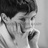

(12055, 2304)
(12055, 1)


In [ ]:
#Colocar todas as fotos SAD em um np.ndarray
img1 = cv.imread('/content/drive/MyDrive/SADAM/Sad/0.jpg')
img1 = np.float32(img1)
cv2_imshow(img1)

folder = '/content/drive/MyDrive/SADAM/Sad'

#images=[]
for filename in os.listdir(folder):
      img = cv.imread(os.path.join(folder,filename))
      #Tirar o RGB
      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
      #Transformar em vetor array
      img = np.array(img)
      #Planificar os valores
      img = img.reshape(-1, 48*48).astype("float32") / 255.00

      if img is not None:
            #images.append(img)
            A = np.vstack((A, img))
            label = np.vstack((label, 1))

print(A.shape)
print(label.shape)

## 4) Separando a base de dados em teste e treinamento



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Dividir em treinamento e teste:
(trainI, testI, trainL, testL) = train_test_split(A, label,test_size=0.20, random_state=42)
print(type(trainI))
print(len(trainL))
print(len(testI))
print(len(testL))

<class 'numpy.ndarray'>
9644
2411
2411


## 5) Criação, treinamento do modelo e definição da acurácia para a base teste

In [ ]:
# Modelo:
#Criando um modelo usando squential, muito conveniente mas não flexivel
#Squential: 1 input and 1 output
model = keras.Sequential(
    [
        layers.Dense(800, activation = "relu"),
        layers.Dense(600, activation = "relu"),
        layers.Dense(300, activation = "relu"),
        layers.Dense(100, activation = "relu"),
        layers.Dense(2),
    ]
)
#Como keras deve configurar detalhes do modelo
#lr = lerning rate, taxa de aprendizado
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"],
)
#Treinamento supervisionado:
model.fit(trainI, trainL, batch_size = 32, epochs = 30, verbose =2)
#Avaliação a acuracia na base de teste:
model.evaluate(testI, testL, batch_size = 32, verbose =2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
302/302 - 7s - loss: 0.6840 - accuracy: 0.5982 - 7s/epoch - 22ms/step
Epoch 2/30
302/302 - 6s - loss: 0.6235 - accuracy: 0.6541 - 6s/epoch - 19ms/step
Epoch 3/30
302/302 - 6s - loss: 0.6119 - accuracy: 0.6672 - 6s/epoch - 19ms/step
Epoch 4/30
302/302 - 6s - loss: 0.5919 - accuracy: 0.6881 - 6s/epoch - 19ms/step
Epoch 5/30
302/302 - 6s - loss: 0.5711 - accuracy: 0.7048 - 6s/epoch - 19ms/step
Epoch 6/30
302/302 - 6s - loss: 0.5660 - accuracy: 0.7083 - 6s/epoch - 19ms/step
Epoch 7/30
302/302 - 7s - loss: 0.5584 - accuracy: 0.7139 - 7s/epoch - 22ms/step
Epoch 8/30
302/302 - 6s - loss: 0.5492 - accuracy: 0.7216 - 6s/epoch - 19ms/step
Epoch 9/30
302/302 - 6s - loss: 0.5404 - accuracy: 0.7240 - 6s/epoch - 19ms/step
Epoch 10/30
302/302 - 6s - loss: 0.5373 - accuracy: 0.7266 - 6s/epoch - 19ms/step
Epoch 11/30
302/302 - 6s - loss: 0.5364 - accuracy: 0.7235 - 6s/epoch - 19ms/step
Epoch 12/30
302/302 - 6s - loss: 0.5251 - accuracy: 0.7363 - 6s/epoch - 19ms/step
Epoch 13/30
302/302 - 7s 

[0.5446456074714661, 0.7241808176040649]

## 6) Resultados obtidos - Teste com uma foto

Testes:
Foto  1 :


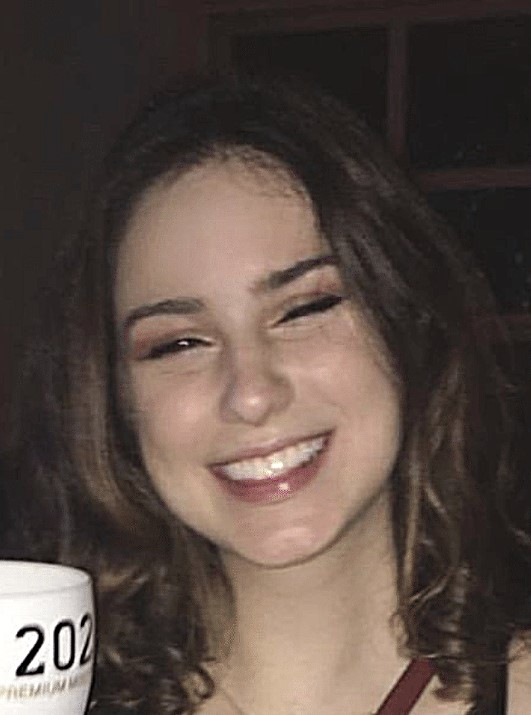

Versão reduzida:


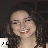

Feliz
Foto  2 :


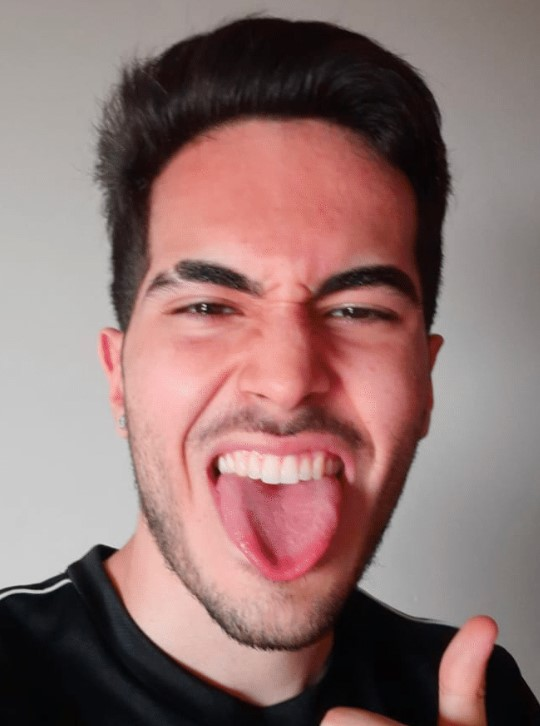

Versão reduzida:


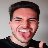

Feliz
Foto  3 :


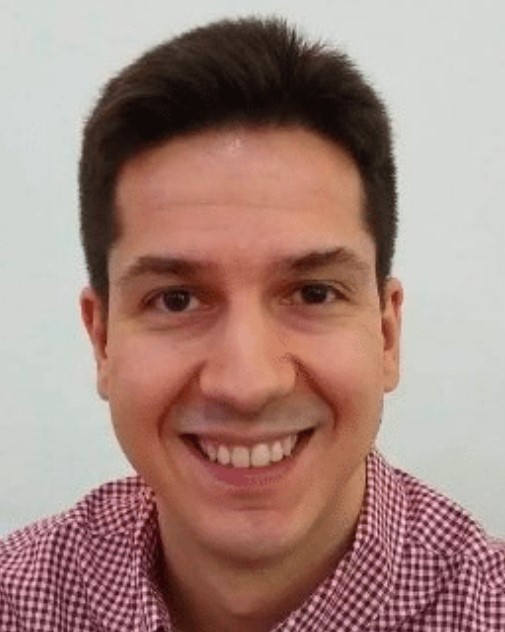

Versão reduzida:


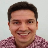

Triste
Foto  4 :


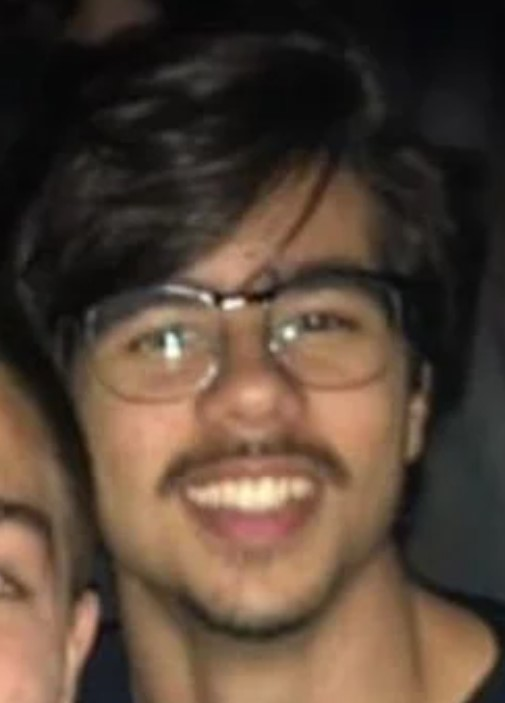

Versão reduzida:


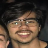

Triste
Foto  5 :


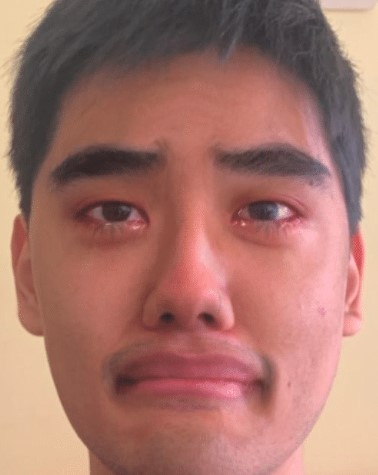

Versão reduzida:


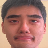

Feliz
Foto  6 :


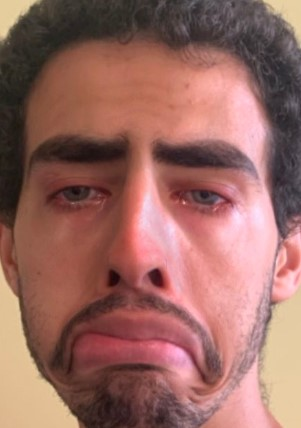

Versão reduzida:


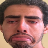

Triste
Foto  7 :


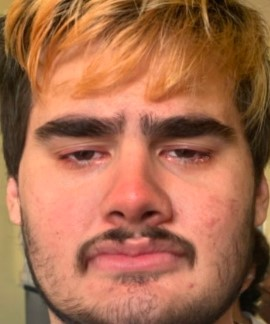

Versão reduzida:


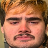

Feliz
Foto  8 :


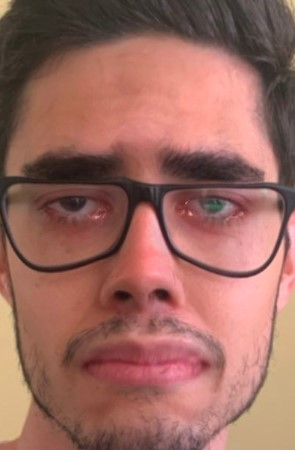

Versão reduzida:


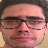

Triste


In [ ]:
#Pegar as fotos para teste:
folder = '/content/drive/MyDrive/SADAM/TESTESdaApresentação'

i = 1

print("Testes:")

for photoname in os.listdir(folder):
      print("Foto ",i,":")
      img = cv.imread(os.path.join(folder,photoname))
      cv2_imshow(img)
      img = cv.resize(img, (48, 48))
      print("Versão reduzida:")
      cv2_imshow(img)

      img = np.float32(img)

      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

      img = img.reshape(-1, 48*48).astype("float32") / 255.00

      img = np.expand_dims(img, axis = 0)
      roi = model.predict(img)
      a = roi.argmax()

      i = i+1
      if a == 0:
          print("Feliz")
      else:
          print("Triste")

## 7) Conclusões
Concluímos que o projeto atendeu às expectativas, com uma alta taxa de acurácia e respondendo corretamente ao que lhe foi solicitado. 

##8) Métricas de qualidade da classificação

In [ ]:
# Importando pacotes

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve


In [ ]:
#Previsões do modelo as imagens de teste (testI):
#Rotulos atribuidos aos testes pelo modelo treinado:
#Numero de fotos no test 2411
testLhat = []
for i in range(2411):
  img = np.expand_dims(testI[i], axis = 0)
  #print(img.shape)
  a = model.predict(img)
  #print(a.argmax())
  testLhat.append(a.argmax())
  #print(model.predict(testL[i]))
testLhat = np.array(testLhat)
print("Tamanho dos rotulos: ",testL.shape)
print("Tamanho do rotulos atribuidos pelo modelo: ",testLhat.shape)
print("Tamanho do rotulos atribuidos pelo modelo: ",type(testL))
print("Tamanho do rotulos atribuidos pelo modelo: ",type(testLhat))
print(testLhat)
print(testL)
#a = roi.argmax()

Tamanho dos rotulos:  (2411, 1)
Tamanho do rotulos atribuidos pelo modelo:  (2411,)
Tamanho do rotulos atribuidos pelo modelo:  <class 'numpy.ndarray'>
Tamanho do rotulos atribuidos pelo modelo:  <class 'numpy.ndarray'>
[0 0 0 ... 1 1 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


[[1208  262]
 [ 403  538]]


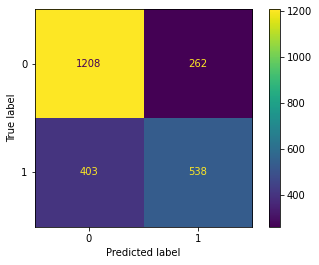

In [ ]:
# 1 Matriz de confusão
Conf_Matrix= confusion_matrix(testL, testLhat) # Obtendo a matrix de confusão

print(Conf_Matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix)
disp.plot()



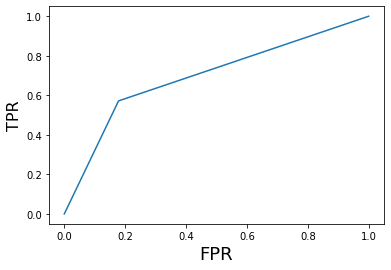

In [ ]:
# 2 Curva ROC

fpr, tpr, delta = roc_curve(testL, testLhat)

plt.plot(fpr,tpr)
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.show()
